# QTM 347 QUIZ 1

1. The Data

The dataset is called baseball.csv and covers Major League Baseball teams from 1998–
2014.

It includes:

• team: Team name

• year: Season year

• payroll: Team payroll in millions of dollars

• win num: Number of wins

• win pct: Winning percentage (0 to 1)

There are 510 rows and 5 columns — one row for each team-season.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import os

In [6]:
bb = pd.read_csv('/Users/danielnickas/Downloads/QTM347/QTM347/QUIZ_1/data/baseball.csv')
bb


,team,year,payroll,win_num,win_pct
0,Arizona Diamondbacks,1998,31.614500,65,0.401235
1,Atlanta Braves,1998,61.708000,106,0.654321
2,Baltimore Orioles,1998,71.860921,79,0.487654
3,Boston Red Sox,1998,59.497000,92,0.567901
4,Chicago Cubs,1998,49.816000,90,0.552147
...,...,...,...,...,...
505,St. Louis Cardinals,2014,111.020360,90,0.555556
506,Tampa Bay Rays,2014,77.062891,77,0.475309
507,Texas Rangers,2014,136.036172,67,0.413580
508,Toronto Blue Jays,2014,132.628700,83,0.512346


Python Skills You Need

Be ready to:

• Load the dataset with pandas.

• Check its size with .shape and check for missing values with .isnull().sum().

• Group by team and calculate totals and averages using groupby().agg().

• Compute mean and standard deviation with .mean() and .std().

• Create simple plots (scatterplots, line plots, boxplots) using matplotlib or seaborn.



In [8]:
print(bb.isnull().sum())

print(bb.shape)



team       0
year       0
payroll    0
win_num    0
win_pct    0
dtype: int64
(510, 5)


In [8]:
bb.grouped = bb.groupby('team').agg({
    'payroll' : ['sum', 'mean', 'std'], # Total, average, and std dev of payroll
    'win_num' : ['sum', 'mean', 'std'], # Total, average, and std dev of wins
    'win_pct' : ['mean', 'std'], # Average and std dev of win percentage
    'team' : ['count'] # Number of seasons, first and last year

})

print("Team Stats Summary using GroupBy and Agg:")
print(bb.grouped)



Team Stats Summary using GroupBy and Agg:
                           payroll                        win_num             \
                               sum        mean        std     sum       mean   
team                                                                           
Arizona Diamondbacks   1222.984147   71.940244  19.220053    1355  79.705882   
Atlanta Braves         1518.309820   89.312342  11.409247    1550  91.176471   
Baltimore Orioles      1305.271022   76.780648  13.134673    1264  74.352941   
Boston Red Sox         2103.580698  123.740041  33.595262    1522  89.529412   
Chicago Cubs           1551.725587   91.277976  28.921845    1310  77.058824   
Chicago White Sox      1375.105932   80.888584  33.391233    1400  82.352941   
Cincinnati Reds        1118.767359   65.809845  22.852842    1357  79.823529   
Cleveland Indians      1113.166636   65.480390  16.559754    1396  82.117647   
Colorado Rockies       1129.311735   66.430102  15.076752    1278  75.176471  

/var/folders/gn/gj8sg0td6vb9_3gh467f7y480000gn/T/ipykernel_49810/2230398935.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bb.grouped = bb.groupby('team').agg({


In [9]:
# Sorting by total payroll:
bb_sorted_payroll = bb.sort_values(by=['payroll', 'team'], ascending=[True, False])
print(bb_sorted_payroll[['team', 'year', 'payroll']])

#Sorted by avg payroll across all years:
bb_avg_payroll = bb.groupby('team')['payroll'].mean().sort_values(ascending=False)
print("Teams sorted by average payroll across all years:")
print(bb_avg_payroll)
print(bb_avg_payroll.shape)


                     team  year     payroll
29   Washington Nationals  1998    8.317000
21     Pittsburgh Pirates  1998   13.695000
254         Miami Marlins  2006   14.998500
14          Miami Marlins  1998   15.141000
44          Miami Marlins  1999   15.150000
..                    ...   ...         ...
378      New York Yankees  2010  206.333389
318      New York Yankees  2008  209.081577
463   Los Angeles Dodgers  2013  216.597577
468      New York Yankees  2013  228.835490
493   Los Angeles Dodgers  2014  235.295219

[510 rows x 3 columns]
Teams sorted by average payroll across all years:
team
New York Yankees         168.064271
Boston Red Sox           123.740041
Los Angeles Dodgers      110.246725
New York Mets            101.093876
Philadelphia Phillies     99.371266
Los Angeles Angels        97.698801
Chicago Cubs              91.277976
Atlanta Braves            89.312342
San Francisco Giants      88.903015
Detroit Tigers            87.290471
St. Louis Cardinals       85.7868

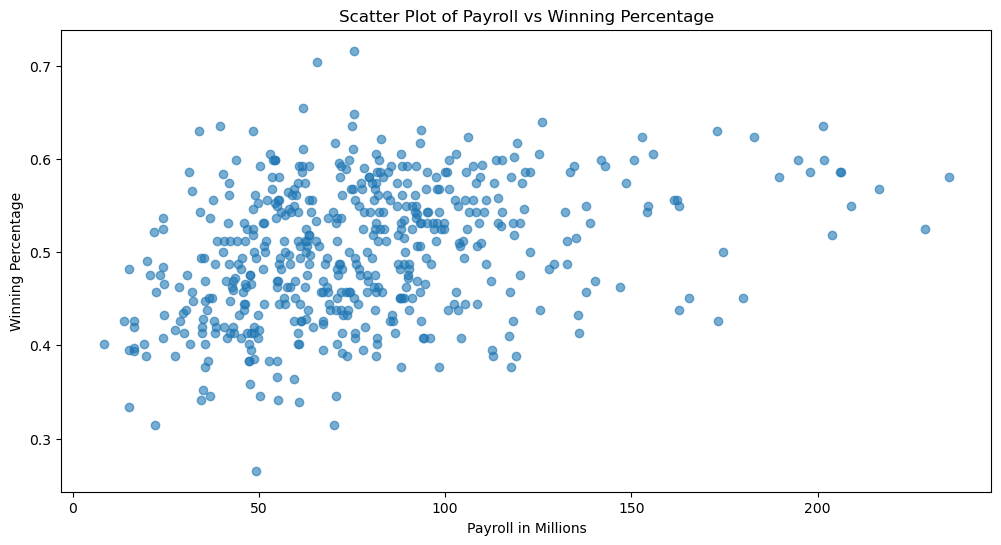

In [10]:
# Create simple plots for payroll and win_pct over years
plt.figure( figsize = (12, 6) )
plt.scatter(bb['payroll'], bb['win_pct'], alpha = 0.6)
plt.xlabel('Payroll in Millions')
plt.ylabel('Winning Percentage')
plt.title('Scatter Plot of Payroll vs Winning Percentage')
plt.show()




<function matplotlib.pyplot.show(close=None, block=None)>

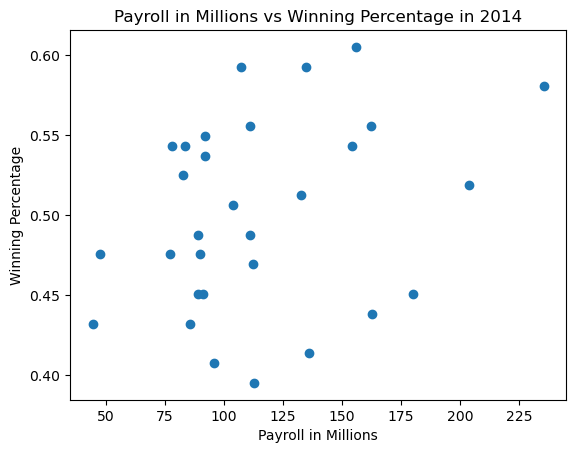

In [ ]:
bb_2014 = bb[bb['year'] == 2014]
plt.scatter(bb_2014['payroll'], bb_2014['win_pct'], alpha = 1)
plt.xlabel('Payroll in Millions')
plt.ylabel('Winning Percentage')
plt.title('Payroll in Millions vs Winning Percentage in 2014')
plt.show


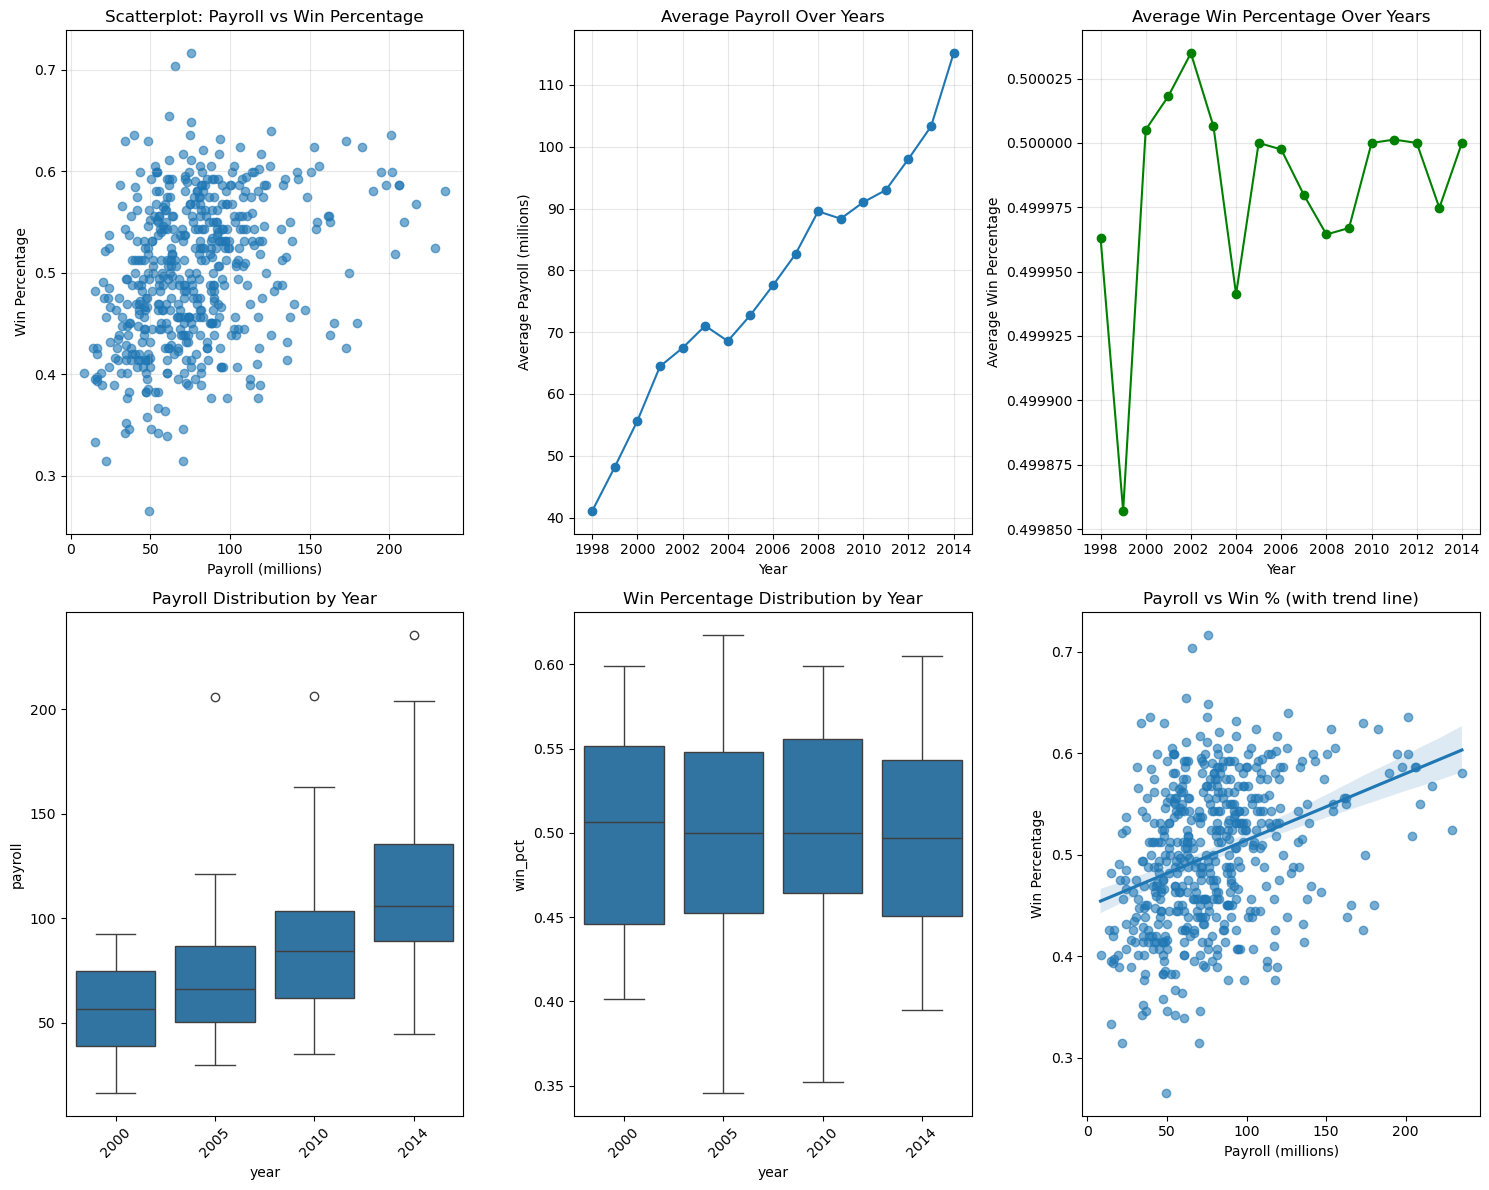


Correlation between Payroll and Win Percentage: 0.345


In [12]:
# Create simple plots for payroll and win_pct over years
plt.figure(figsize=(15, 12))

# 1. Scatterplot: Payroll vs Win Percentage
plt.subplot(2, 3, 1)
plt.scatter(bb['payroll'], bb['win_pct'], alpha=0.6)
plt.xlabel('Payroll (millions)')
plt.ylabel('Win Percentage')
plt.title('Scatterplot: Payroll vs Win Percentage')
plt.grid(True, alpha=0.3)

# 2. Line plot: Average Payroll over Years
plt.subplot(2, 3, 2)
yearly_payroll = bb.groupby('year')['payroll'].mean()
plt.plot(yearly_payroll.index, yearly_payroll.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Payroll (millions)')
plt.title('Average Payroll Over Years')
plt.grid(True, alpha=0.3)

# 3. Line plot: Average Win Percentage over Years
plt.subplot(2, 3, 3)
yearly_winpct = bb.groupby('year')['win_pct'].mean()
plt.plot(yearly_winpct.index, yearly_winpct.values, marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Average Win Percentage')
plt.title('Average Win Percentage Over Years')
plt.grid(True, alpha=0.3)

# 4. Boxplot: Payroll distribution by year (sample of years)
plt.subplot(2, 3, 4)
sample_years = [2000, 2005, 2010, 2014]
bb_sample = bb[bb['year'].isin(sample_years)]
sns.boxplot(data=bb_sample, x='year', y='payroll')
plt.title('Payroll Distribution by Year')
plt.xticks(rotation=45)

# 5. Boxplot: Win percentage distribution by year (sample of years)
plt.subplot(2, 3, 5)
sns.boxplot(data=bb_sample, x='year', y='win_pct')
plt.title('Win Percentage Distribution by Year')
plt.xticks(rotation=45)

# 6. Scatterplot with trend: Payroll vs Win Pct with regression line
plt.subplot(2, 3, 6)
sns.regplot(data=bb, x='payroll', y='win_pct', scatter_kws={'alpha':0.6})
plt.xlabel('Payroll (millions)')
plt.ylabel('Win Percentage')
plt.title('Payroll vs Win % (with trend line)')

plt.tight_layout()
plt.show()

# Additional: Show correlation
correlation = bb['payroll'].corr(bb['win_pct'])
print(f"\nCorrelation between Payroll and Win Percentage: {correlation:.3f}")

### 3. Statistics Concepts

Make sure you understand:

#### • What the sample mean and standard deviation tell you.

Sample mean: average value of a variable in the dataset
std dev: measure of how much the values of a variable vary around the mean. Low std dev means values are close to the mean, high std dev means they are spread out.

#### • Why the league-wide average winning percentage is about 0.5.

League-Wide average winnin percentage is 0.5 because for every game played, one team wins and one team loses. Over a large number of games, the total number of wins and losses across al teams will balance out.

#### • The 68–95–99.7 rule of the normal distribution and how to interpret data relative to the mean.

In a normal distribution:  
- 68%: of data falls within one standard deviation of the mean.

- 95%: of data falls within two standard deviations of the mean.

- 99.7%: of data falls within three standard deviations of the mean.

#### • How to interpret changes and comparisons across teams and years.

#### 4. Visualization Interpretation

Be ready to explain what you see in:

#### • Scatterplots: payroll vs. win percentage, across different time periods.

#### • Line plots: payroll trends over time for specific teams (e.g., high-spending vs. lowspending teams).

#### • Boxplots: payroll distributions by year (and what the median shows).


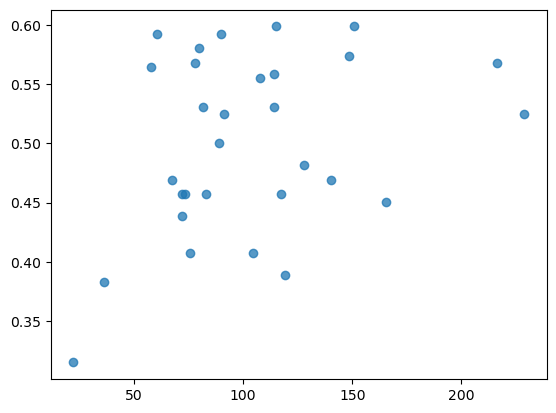

In [ ]:
# Scatter Plot for 2013 Payroll vs. Win Percentage
plt.scatter(bb[bb['year'] == 2013]['payroll'], bb[bb['year'] == 2013]['win_pct'], alpha = 0.75)
plt.show()

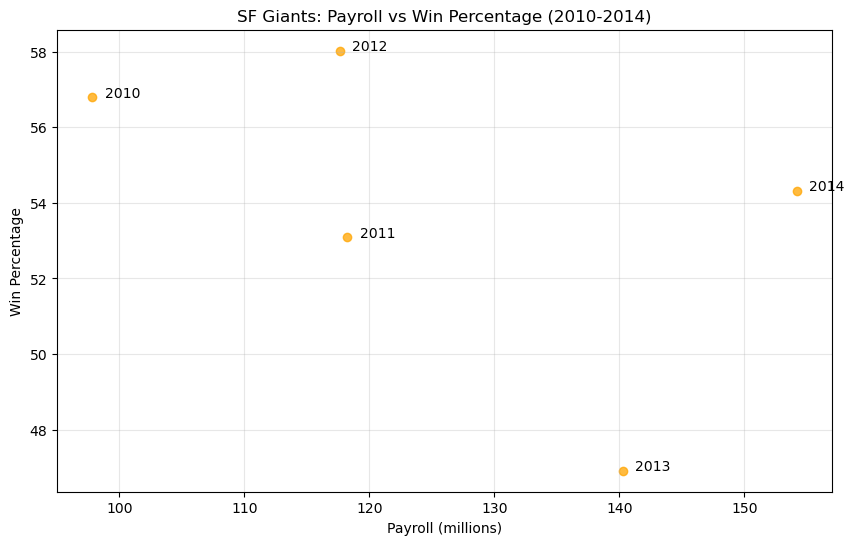

In [13]:
sfg_golden_years = bb[(bb['team']=='San Francisco Giants') & (bb['year'].between(2010, 2014))] 
# can use .isin([2010, 2011, 2012, 2013, 2014])
plt.figure(figsize = (10,6))
plt.scatter(sfg_golden_years['payroll'], sfg_golden_years['win_pct']*100, color = 'orange', alpha = 0.75)
            
for i, row in sfg_golden_years.iterrows():
    plt.text(row['payroll']+1, row['win_pct']*100, str(int(row['year'])), fontsize=10)
plt.xlabel('Payroll (millions)')
plt.ylabel('Win Percentage')
plt.title('SF Giants: Payroll vs Win Percentage (2010-2014)')
plt.grid(True, alpha=0.3)
plt.show()


### 6. Principal Component Analysis (PCA)

You should understand:

•PCA creates new variables (principal components) as linear combinations of all features.

- Each principal component captures a portion of the total variance in the data.

•Loadings define the direction of components and are unique up to a sign change.

- The first principal component (PC1) captures the most variance, the second (PC2) the next most, and so on.
- Each subsequent component captures the remaining variance not explained by the previous components.
- Loadings indicate how much each original variable contributes to each principal component.

•How to read PCA plots: PC1 vs. PC2, scores of points, and meaning of loadings.

- PCA is sensitive to the scale of features, so standardization (mean=0, std=1) is important before applying PCA.
- Scree plots show the variance explained by each principal component, helping to decide how many components to keep.

- High positive scores on PC1 indicate high values across all original features, while high negative scores indicate low values across all features.

- Low negative scores on PC1 indicate low values across all original features, while low positive scores indicate high values across all features.

- Near-zero scores on PC1 indicate average values across all original features.

Loadings are weights used in linear combinations.
The sign of the loadings is arbitrary, so they can be positive or negative without changing the interpretation of the component.






### 7. Empirical Error vs True Error

Understanding the difference between these two types of errors is crucial in machine learning:

#### **True Error (Generalization Error)**
- The error rate of a model on the **entire population** of data
- What we really care about - how well does our model perform on all possible data?
- **Unknown and unknowable** in practice because we can't access the entire population
- Also called "population error" or "generalization error"

#### **Empirical Error (Training Error)**
- The error rate of a model on the **training dataset** we actually have
- What we can **measure and calculate** from our available data
- Also called "sample error" or "training error"
- Always an **estimate** of the true error

#### **Key Relationships:**
- **Empirical error ≤ True error** (usually)
- As training set size increases → Empirical error approaches True error
- **Overfitting**: Large gap between empirical and true error
- **Good generalization**: Small gap between empirical and true error

#### **Why This Matters:**
- We use empirical error to estimate true error
- Cross-validation helps get better estimates of true error
- The goal is to minimize true error, not just empirical error
- Understanding this difference helps prevent overfitting

#### **Example:**
- Train a model on 1000 baseball games → Empirical error = 15%
- True error on all possible baseball games might be 20%
- The 5% difference represents how well our sample generalizes

In [ ]:
# Demonstration of Empirical vs True Error Concepts
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Create a simple example with baseball data
np.random.seed(42)

# Simulate the "true" relationship between payroll and win percentage
def true_function(payroll):
    # True relationship: slight positive correlation with some noise
    return 0.4 + 0.003 * payroll + 0.05 * np.sin(payroll/50)

# Generate "population" data (what we'd get if we had infinite data)
payroll_pop = np.linspace(50, 250, 1000)
win_pct_pop = true_function(payroll_pop) + np.random.normal(0, 0.05, 1000)

# Sample smaller training sets (what we actually observe)
sample_sizes = [50, 100, 200, 500]
plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes):
    plt.subplot(2, 2, i+1)
    
    # Sample from the population
    indices = np.random.choice(1000, n, replace=False)
    payroll_sample = payroll_pop[indices]
    win_pct_sample = win_pct_pop[indices]
    
    # Fit models with different complexity
    models = {
        'Linear': make_pipeline(PolynomialFeatures(1), LinearRegression()),
        'Polynomial (degree 5)': make_pipeline(PolynomialFeatures(5), LinearRegression())
    }
    
    colors = ['blue', 'red']
    
    for j, (name, model) in enumerate(models.items()):
        # Fit model
        model.fit(payroll_sample.reshape(-1, 1), win_pct_sample)
        
        # Calculate empirical error (on training data)
        pred_sample = model.predict(payroll_sample.reshape(-1, 1))
        empirical_error = mean_squared_error(win_pct_sample, pred_sample)
        
        # Calculate true error (on full population - what we'd never have in practice)
        pred_pop = model.predict(payroll_pop.reshape(-1, 1))
        true_error = mean_squared_error(win_pct_pop, pred_pop)
        
        # Plot predictions
        x_plot = np.linspace(50, 250, 100)
        y_plot = model.predict(x_plot.reshape(-1, 1))
        plt.plot(x_plot, y_plot, color=colors[j], 
                label=f'{name}\nEmp: {empirical_error:.4f}, True: {true_error:.4f}')
    
    # Plot data
    plt.scatter(payroll_sample, win_pct_sample, alpha=0.6, color='black', s=20)
    plt.xlabel('Payroll (millions)')
    plt.ylabel('Win Percentage')
    plt.title(f'Sample Size: {n}')
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.ylim(0.3, 0.7)

plt.tight_layout()
plt.suptitle('Empirical vs True Error: Effect of Sample Size and Model Complexity', 
             fontsize=16, y=1.02)
plt.show()

print("Key Observations:")
print("1. Empirical error is usually lower than true error (especially for complex models)")
print("2. As sample size increases, empirical error gets closer to true error")
print("3. Simple models have smaller gap between empirical and true error")
print("4. Complex models can have very low empirical error but high true error (overfitting)")

In [ ]:
# Simple baseball example showing empirical vs true error
# Using actual baseball data patterns

# Let's use our baseball data to demonstrate this concept
print("Empirical vs True Error Example with Baseball Data")
print("=" * 50)

# Split data into training and "test" (simulating population)
from sklearn.model_selection import train_test_split

# Use payroll to predict win percentage
X = bb['payroll'].values.reshape(-1, 1)
y = bb['win_pct'].values

# Split: 70% train, 30% test (test represents "true population")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit different models
models = {
    'Linear': LinearRegression(),
    'Polynomial (degree 3)': make_pipeline(PolynomialFeatures(3), LinearRegression()),
    'Polynomial (degree 8)': make_pipeline(PolynomialFeatures(8), LinearRegression())
}

results = []

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Empirical error (training error)
    pred_train = model.predict(X_train)
    empirical_error = mean_squared_error(y_train, pred_train)
    
    # True error (test error - simulating population)
    pred_test = model.predict(X_test)
    true_error = mean_squared_error(y_test, pred_test)
    
    # Calculate overfitting gap
    overfitting_gap = true_error - empirical_error
    
    results.append({
        'Model': name,
        'Empirical Error': empirical_error,
        'True Error': true_error,
        'Overfitting Gap': overfitting_gap
    })
    
    print(f"\n{name}:")
    print(f"  Empirical Error (training): {empirical_error:.6f}")
    print(f"  True Error (test):          {true_error:.6f}")
    print(f"  Overfitting Gap:            {overfitting_gap:.6f}")

print("\n" + "=" * 50)
print("Interpretation:")
print("• Empirical error is what we can measure on our training data")
print("• True error is what we really care about (performance on new data)")
print("• Overfitting gap shows how much our model memorized vs. generalized")
print("• Positive gap = overfitting, Negative gap = underfitting")

### 8. PCA Quiz Questions - Detailed Analysis

#### Question 12: PCA on SVABS's 10 tests
**When we perform PCA on SVABS's 10 tests, the leading PC component (or PC1 score)**

**Answer: B. is a linear combination of all 10 tests from SVABS.**

**Explanation:**
- PCA creates principal components as **linear combinations of ALL original features**
- PC1 = w₁×test₁ + w₂×test₂ + ... + w₁₀×test₁₀ (all 10 tests)
- It doesn't select a subset of tests (option A is wrong)
- It's not just the highest score (option C is wrong)
- Each PC uses information from every original variable

#### Question 13: PCA Plot Analysis
**Given: PC1 direction line with (.71, .71), point p1 at (1.67, 0.69)**

**Correct Answers: A, B, and C are ALL correct**

**A. p1 has the largest PC score on PC1** ✓
- PC1 score = projection of point onto PC1 direction
- PC1 score for p1 = (1.67, 0.69) · (0.71, 0.71) = 1.67×0.71 + 0.69×0.71 ≈ 1.675
- This appears to be the largest based on the graph position

**B. Loadings of PC1 is (0.71, 0.71)** ✓
- Loadings define the direction of the principal component
- (0.71, 0.71) represents how much each original variable contributes to PC1
- These are the weights in the linear combination

**C. (-0.71, -0.71) is also loadings for PC1** ✓
- **Key PCA property: Loadings are unique up to sign change**
- Both (0.71, 0.71) and (-0.71, -0.71) represent the same direction
- The sign is arbitrary - what matters is the relative direction

In [ ]:
# Demonstration of PCA concepts from the quiz questions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Question 13 demonstration: PC1 direction and point projection
print("=== Question 13 Demonstration ===")

# Given information
pc1_direction = np.array([0.71, 0.71])
point_p1 = np.array([1.67, 0.69])

# Calculate PC1 score for point p1
pc1_score = np.dot(point_p1, pc1_direction)
print(f"Point p1: {point_p1}")
print(f"PC1 direction: {pc1_direction}")
print(f"PC1 score for p1: {pc1_score:.3f}")

# Demonstrate that (-0.71, -0.71) gives the same relative information
pc1_direction_negative = np.array([-0.71, -0.71])
pc1_score_negative = np.dot(point_p1, pc1_direction_negative)
print(f"PC1 direction (negative): {pc1_direction_negative}")
print(f"PC1 score with negative loadings: {pc1_score_negative:.3f}")
print(f"Magnitude is same: {abs(pc1_score):.3f} = {abs(pc1_score_negative):.3f}")

# Visualize the concept
plt.figure(figsize=(12, 5))

# Plot 1: Show PC1 direction and point projection
plt.subplot(1, 2, 1)
# Plot coordinate axes
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot PC1 direction line (extended)
line_extend = 2.5
x_line = np.array([-line_extend, line_extend]) * pc1_direction[0]
y_line = np.array([-line_extend, line_extend]) * pc1_direction[1]
plt.plot(x_line, y_line, 'r-', linewidth=2, label='PC1 direction (0.71, 0.71)')

# Plot the alternative PC1 direction
plt.plot(-x_line, -y_line, 'r--', linewidth=2, alpha=0.7, label='PC1 direction (-0.71, -0.71)')

# Plot point p1
plt.scatter(*point_p1, color='blue', s=100, zorder=5, label='Point p1 (1.67, 0.69)')

# Draw projection line
projection = (np.dot(point_p1, pc1_direction) / np.dot(pc1_direction, pc1_direction)) * pc1_direction
plt.plot([point_p1[0], projection[0]], [point_p1[1], projection[1]], 'g--', alpha=0.7, label='Projection')
plt.scatter(*projection, color='green', s=80, zorder=5, label='Projection on PC1')

plt.xlabel('Word Score (standardized)')
plt.ylabel('Paragraph Score (standardized)')
plt.title('PC1 Direction and Point Projection')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plot 2: Show multiple points and their PC1 scores
plt.subplot(1, 2, 2)
# Create some example points
np.random.seed(42)
example_points = np.random.randn(15, 2) * 0.8
example_points = np.vstack([example_points, point_p1.reshape(1, -1)])

# Calculate PC1 scores for all points
pc1_scores = np.dot(example_points, pc1_direction)

# Plot points colored by PC1 score
scatter = plt.scatter(example_points[:, 0], example_points[:, 1], 
                     c=pc1_scores, cmap='RdYlBu_r', s=60, alpha=0.8)
plt.colorbar(scatter, label='PC1 Score')

# Highlight point p1
plt.scatter(*point_p1, color='red', s=150, edgecolor='black', linewidth=2, 
           label=f'p1: PC1 score = {pc1_score:.3f}', zorder=5)

# Plot PC1 direction
plt.plot(x_line, y_line, 'k-', linewidth=2, alpha=0.7, label='PC1 direction')

plt.xlabel('Word Score (standardized)')
plt.ylabel('Paragraph Score (standardized)')
plt.title('Points Colored by PC1 Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nKey insights:")
print(f"• Point p1 has PC1 score = {pc1_score:.3f}")
print(f"• Loadings (0.71, 0.71) and (-0.71, -0.71) represent the same component")
print(f"• PC1 captures the direction of maximum variance in the data")

In [ ]:
# Question 12 demonstration: Linear combination of ALL variables
print("\n=== Question 12 Demonstration ===")
print("PCA creates components as linear combinations of ALL original variables")

# Simulate 10 test scores (like SVABS)
np.random.seed(123)
n_students = 100
n_tests = 10

# Create correlated test data (students good at one test tend to be good at others)
base_ability = np.random.randn(n_students, 1)
test_scores = base_ability + np.random.randn(n_students, n_tests) * 0.3

# Standardize the data
scaler = StandardScaler()
test_scores_scaled = scaler.fit_transform(test_scores)

# Perform PCA
pca = PCA()
pca.fit(test_scores_scaled)

# Get the first principal component (PC1)
pc1_loadings = pca.components_[0]

print(f"PC1 loadings for all 10 tests:")
for i, loading in enumerate(pc1_loadings):
    print(f"  Test {i+1}: {loading:.3f}")

print(f"\nPC1 equation:")
equation_parts = [f"{loading:.3f}×Test{i+1}" for i, loading in enumerate(pc1_loadings)]
print(f"PC1 = {' + '.join(equation_parts[:3])} + ... + {equation_parts[-1]}")

print(f"\nKey points:")
print(f"• PC1 uses ALL {n_tests} tests, not a subset")
print(f"• Each test contributes with its own weight (loading)")
print(f"• PC1 explains {pca.explained_variance_ratio_[0]:.1%} of total variance")

# Show that PC1 score for a student is computed using all tests
student_1_scores = test_scores_scaled[0]
pc1_score_manual = np.sum(pc1_loadings * student_1_scores)
pc1_score_sklearn = pca.transform(test_scores_scaled)[0, 0]

print(f"\nExample for Student 1:")
print(f"  Manual calculation: {pc1_score_manual:.4f}")
print(f"  sklearn calculation: {pc1_score_sklearn:.4f}")
print(f"  Match: {np.isclose(pc1_score_manual, pc1_score_sklearn)}")

### 9. Normal Distribution Analysis - Oakland Athletics Win Percentage

**Problem:** Oakland Athletics's win pct ave = 0.54. Assuming win pct ave follows a normal distribution, what percentage of teams have higher/lower win percentages?

**Key Steps:**
1. Calculate mean and standard deviation of team win percentage averages
2. Find Oakland's z-score: z = (0.54 - mean) / std
3. Use normal distribution properties to find percentiles
4. Apply 68-95-99.7 rule or z-table

**Normal Distribution Facts to Remember:**
- Mean ± 1 std: 68% of data (16% in each tail)
- Mean ± 2 std: 95% of data (2.5% in each tail)  
- Mean ± 3 std: 99.7% of data (0.15% in each tail)

In [ ]:
# Analyze Oakland Athletics win percentage in normal distribution context
import scipy.stats as stats

print("=== Oakland Athletics Win Percentage Analysis ===")

# Calculate average win percentage for each team across all years
team_win_pct_avg = bb.groupby('team')['win_pct'].mean()

print(f"Number of teams: {len(team_win_pct_avg)}")
print(f"Oakland Athletics average win pct: {team_win_pct_avg['Oakland Athletics']:.3f}")

# Calculate population statistics
mean_win_pct = team_win_pct_avg.mean()
std_win_pct = team_win_pct_avg.std()

print(f"\nPopulation statistics:")
print(f"Mean win percentage: {mean_win_pct:.4f}")
print(f"Standard deviation: {std_win_pct:.4f}")

# Oakland's z-score
oakland_win_pct = 0.54  # Given in the problem
z_score = (oakland_win_pct - mean_win_pct) / std_win_pct

print(f"\nOakland Athletics analysis:")
print(f"Win pct: {oakland_win_pct:.3f}")
print(f"Z-score: {z_score:.3f}")

# Calculate percentiles
percentile_below = stats.norm.cdf(z_score) * 100
percentile_above = (1 - stats.norm.cdf(z_score)) * 100

print(f"\nPercentile analysis:")
print(f"Teams with LOWER win pct than Oakland: {percentile_below:.1f}%")
print(f"Teams with HIGHER win pct than Oakland: {percentile_above:.1f}%")

# Determine which answer is correct based on 68-95-99.7 rule
print(f"\nUsing 68-95-99.7 rule:")
print(f"Z-score ≈ {z_score:.1f}")

if abs(z_score) <= 1:
    if z_score > 0:
        tail_pct = (1 - 0.68) / 2 * 100  # Upper tail beyond 1 std
        print(f"Oakland is about {abs(z_score):.1f} standard deviations above mean")
        print(f"Approximately {tail_pct:.0f}% of teams have higher win pct")
    else:
        tail_pct = 0.68 / 2 * 100  # Lower portion
        print(f"Oakland is about {abs(z_score):.1f} standard deviations below mean")
        print(f"Approximately {100-tail_pct:.0f}% of teams have lower win pct")

# Visual representation
plt.figure(figsize=(12, 8))

# Plot 1: Distribution of team win percentages
plt.subplot(2, 2, 1)
plt.hist(team_win_pct_avg, bins=15, alpha=0.7, density=True, color='lightblue', edgecolor='black')
plt.axvline(mean_win_pct, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_win_pct:.3f}')
plt.axvline(oakland_win_pct, color='orange', linestyle='-', linewidth=3, label=f'Oakland: {oakland_win_pct:.3f}')
plt.xlabel('Average Win Percentage')
plt.ylabel('Density')
plt.title('Distribution of Team Win Percentage Averages')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Normal distribution with Oakland's position
plt.subplot(2, 2, 2)
x = np.linspace(mean_win_pct - 4*std_win_pct, mean_win_pct + 4*std_win_pct, 1000)
y = stats.norm.pdf(x, mean_win_pct, std_win_pct)
plt.plot(x, y, 'b-', linewidth=2, label='Normal Distribution')

# Shade area above Oakland's win pct
x_above = x[x >= oakland_win_pct]
y_above = stats.norm.pdf(x_above, mean_win_pct, std_win_pct)
plt.fill_between(x_above, 0, y_above, alpha=0.3, color='red', label=f'Above Oakland ({percentile_above:.1f}%)')

plt.axvline(mean_win_pct, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_win_pct:.3f}')
plt.axvline(oakland_win_pct, color='orange', linestyle='-', linewidth=3, label=f'Oakland: {oakland_win_pct:.3f}')
plt.xlabel('Win Percentage')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: 68-95-99.7 rule visualization
plt.subplot(2, 2, 3)
x_norm = np.linspace(-4, 4, 1000)
y_norm = stats.norm.pdf(x_norm, 0, 1)
plt.plot(x_norm, y_norm, 'b-', linewidth=2)

# Mark standard deviations
for i in range(-3, 4):
    plt.axvline(i, color='gray', linestyle=':', alpha=0.7)
    if i != 0:
        plt.text(i, 0.02, f'{i}σ', ha='center', fontsize=10)

# Mark Oakland's position
plt.axvline(z_score, color='orange', linestyle='-', linewidth=3, label=f'Oakland (z={z_score:.2f})')

# Shade relevant areas
if z_score > 0:
    x_tail = x_norm[x_norm >= z_score]
    y_tail = stats.norm.pdf(x_tail, 0, 1)
    plt.fill_between(x_tail, 0, y_tail, alpha=0.3, color='red')

plt.xlabel('Z-score (Standard Deviations)')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Answer choices analysis
plt.subplot(2, 2, 4)
choices = ['A: 5%', 'B: 2.5%', 'C: 16%', 'D: 16% lower']
actual_values = [5, 2.5, 16, 100-16]
oakland_actual = percentile_above

bars = plt.bar(choices, actual_values, alpha=0.7, color=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])
plt.axhline(oakland_actual, color='orange', linestyle='-', linewidth=3, 
           label=f'Oakland actual: {oakland_actual:.1f}%')

# Highlight the closest answer
closest_idx = np.argmin([abs(val - oakland_actual) for val in actual_values])
bars[closest_idx].set_color('green')
bars[closest_idx].set_alpha(1.0)

plt.ylabel('Percentage')
plt.title('Answer Choices vs Actual')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n" + "="*50)
print(f"CONCLUSION:")
print(f"Oakland's z-score is {z_score:.2f}")
print(f"Approximately {percentile_above:.1f}% of teams have higher win pct than Oakland")
print(f"The closest answer is: {'C' if abs(16 - percentile_above) < abs(2.5 - percentile_above) else 'B'}")